In [16]:
import coco
import numpy as np
import pickle
import copy
import os
import sys
from PIL import Image
import os.path
import matplotlib.pyplot as plt
import h5py

In [ ]:
coco.maybe_download_and_extract()

In [3]:
def load_image(path, size=None):
    """
    Load the image from the given file-path and resize it
    to the given size if not None.
    """
    # Load the image using PIL.
    img = Image.open(path)
    # Resize image if desired.
    if not size is None:
        img = img.resize(size=size, resample=Image.LANCZOS)
    # Convert image to numpy array.
    img = np.array(img)
    # Scale image-pixels so they fall between 0.0 and 1.0
    img = img / 255.0
    # Convert 2-dim gray-scale array to 3-dim RGB array.
    if (len(img.shape) == 2):
        img = np.repeat(img[:, :, np.newaxis], 3, axis=2)
    return img

In [4]:
img_size = (224, 224)

### validation

In [13]:
with open('records_val.pkl', 'rb') as f:
    data = pickle.load(f)
    
val_filenames, captions_val = data[1], data[2]

In [14]:
val_x = []
val_y = []
for i in range(len(val_filenames)):
    name = val_filenames[i]
    path = os.path.join('data/coco/val2017', name)
    img = load_image(path, size=img_size)
    val_x.append(img)
    val_y.append(captions_val[i])

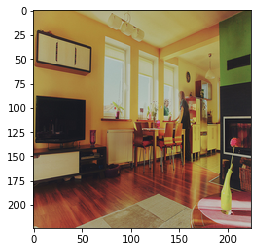

In [17]:
plt.imshow(val_x[0])
plt.show()

In [18]:
val_y[0]

['A woman stands in the dining area at the table.',
 'A room with chairs, a table, and a woman in it.',
 'A woman standing in a kitchen by a window',
 'A person standing at a table in a room.',
 'A living area with a television and a table']

In [ ]:
val_img = h5py.File('data/coco/val_image.h5', 'w')
val_img.create_dataset('val_image', data=val_x)
val_img.close()

In [ ]:
with open("data/coco/val_caption.pkl", "wb") as output_file:
    pickle.dump(val_y, output_file)

### train

In [ ]:
with open('records_train.pkl', 'rb') as f:
    data = pickle.load(f)
    
train_filenames, captions_train = data[1], data[2]

In [ ]:
train_x = []
train_y = []
for i in range(len(train_filenames)):
    name = train_filenames[i]
    path = os.path.join('data/coco/train2017', name)
    img = load_image(path, size=img_size)
    train_x.append(img)
    train_y.append(captions_train[i])